In [7]:
import cv2
from os import listdir
from os.path import isfile, join
from os import walk
import numpy as np
from bidict import bidict
from tqdm import tqdm
train_data_path = r'C:\Users\annch\OneDrive\Desktop\სამაგისტრო\ხელნაწერები'


In [114]:
import matplotlib. pyplot as plt
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
ENCODER = bidict({
    'ა': 1, 'ბ': 2, 'გ': 3, 'დ': 4, 'ე': 5, 'ვ': 6,
    'ზ': 7, 'თ': 8, 'ი': 9, 'კ': 10, 'ლ': 11, 'მ': 12,
    'ნ': 13, 'ო': 14, 'პ': 15, 'ჟ': 16, 'რ': 17, 'ს': 18,
    'ტ': 19, 'უ': 20, 'ფ': 21, 'ქ': 22, 'ღ': 23, 'ყ': 24,
    'შ': 25, 'ჩ': 26,'ც':27, 'ძ':28, 'წ':29, 'ჭ':30, 'ხ':31, 'ჯ':32, 'ჰ': 33
})

In [58]:
img_data = {}
for f in tqdm(listdir(train_data_path)):
    if isfile(join(train_data_path, f)):
        continue
    dir_path = join(train_data_path, f)
    for imgs in listdir(dir_path):
        path = join(dir_path, imgs)
        img_vector = cv2.imdecode(np.fromfile(path, dtype=np.uint8),  cv2.IMREAD_GRAYSCALE).astype("float32")
        img_vector = cv2.resize(img_vector, (50, 50), interpolation = cv2.INTER_AREA) / 255
        img_vector = np.expand_dims(img_vector,-1)
        # img_vector.resize(50, 50, refcheck=False)
        key = [c for c in imgs if not 0 <= ord(c) <= 127][0]
        img_data.setdefault(ENCODER[key],[]).append(img_vector)

100%|██████████| 204/204 [00:14<00:00, 14.14it/s]


In [59]:
for ob in img_data.values():
    for li in ob:
        print(li.shape)

(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50, 50, 1)
(50,

ა


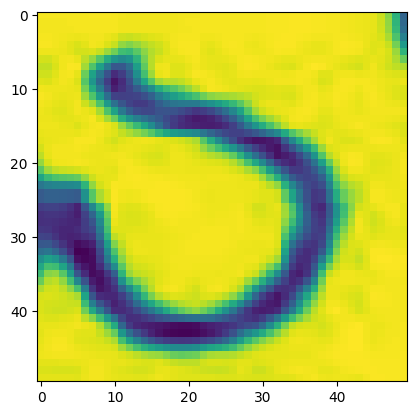

In [56]:
print(ENCODER.inverse[1])
plt.figure()
plt.imshow(img_data[1][0])
plt.grid(False)
plt.show()

In [99]:
imgs = np.array([val for ob in img_data.values() for val in ob])

labels = []
for key, value in img_data.items():
    labels.extend([key]* len(value))
labels = np.array(labels)

In [105]:
imgs.shape, labels.shape

((48625, 50, 50, 1), (48625,))

In [106]:
labels, imgs = shuffle(labels, imgs)
split = .75
labels_train = labels[:int(len(labels) * split)]
labels_test = labels[int(len(labels) * split):]

imgs_train = imgs[:int(len(imgs) * split)]
imgs_test = imgs[int(len(imgs) * split):]

In [107]:
batch_size = 16
epochs = 20
model = keras.Sequential([
    keras.Input(shape=(50,50,1)),
    layers.Conv2D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.2),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(len(ENCODER)+1, activation='softmax')
])

In [108]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)
optimizer = keras.optimizers.Adam()
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [109]:
imgs_train.shape

(36468, 50, 50, 1)

In [110]:
model.fit(imgs_train, labels_train, batch_size=batch_size, epochs=epochs, validation_data=(imgs_test, labels_test), callbacks=[early_stopping])

Epoch 1/20
2280/2280 [==============================] - 69s 30ms/step - loss: 1.7837 - accuracy: 0.5172 - val_loss: 1.2465 - val_accuracy: 0.6639
Epoch 2/20
2280/2280 [==============================] - 75s 33ms/step - loss: 1.1688 - accuracy: 0.6754 - val_loss: 1.1085 - val_accuracy: 0.7046
Epoch 3/20
2280/2280 [==============================] - 77s 34ms/step - loss: 1.0124 - accuracy: 0.7196 - val_loss: 1.0101 - val_accuracy: 0.7269
Epoch 4/20
2280/2280 [==============================] - 79s 35ms/step - loss: 0.9044 - accuracy: 0.7464 - val_loss: 0.9667 - val_accuracy: 0.7392
Epoch 5/20
2280/2280 [==============================] - 77s 34ms/step - loss: 0.8207 - accuracy: 0.7687 - val_loss: 0.9374 - val_accuracy: 0.7491
Epoch 6/20
2280/2280 [==============================] - 54s 24ms/step - loss: 0.7536 - accuracy: 0.7849 - val_loss: 0.8955 - val_accuracy: 0.7610
Epoch 7/20
2280/2280 [==============================] - 60s 26ms/step - loss: 0.7048 - accuracy: 0.8017 - val_loss: 0.8767 -

In [112]:
labels_pred = np.argmax(model.predict(imgs_test), axis=1)

380/380 [==============================] - 4s 9ms/step


In [113]:
cm = confusion_matrix(labels_test, labels_pred, labels=list(ENCODER.inverse.keys()))

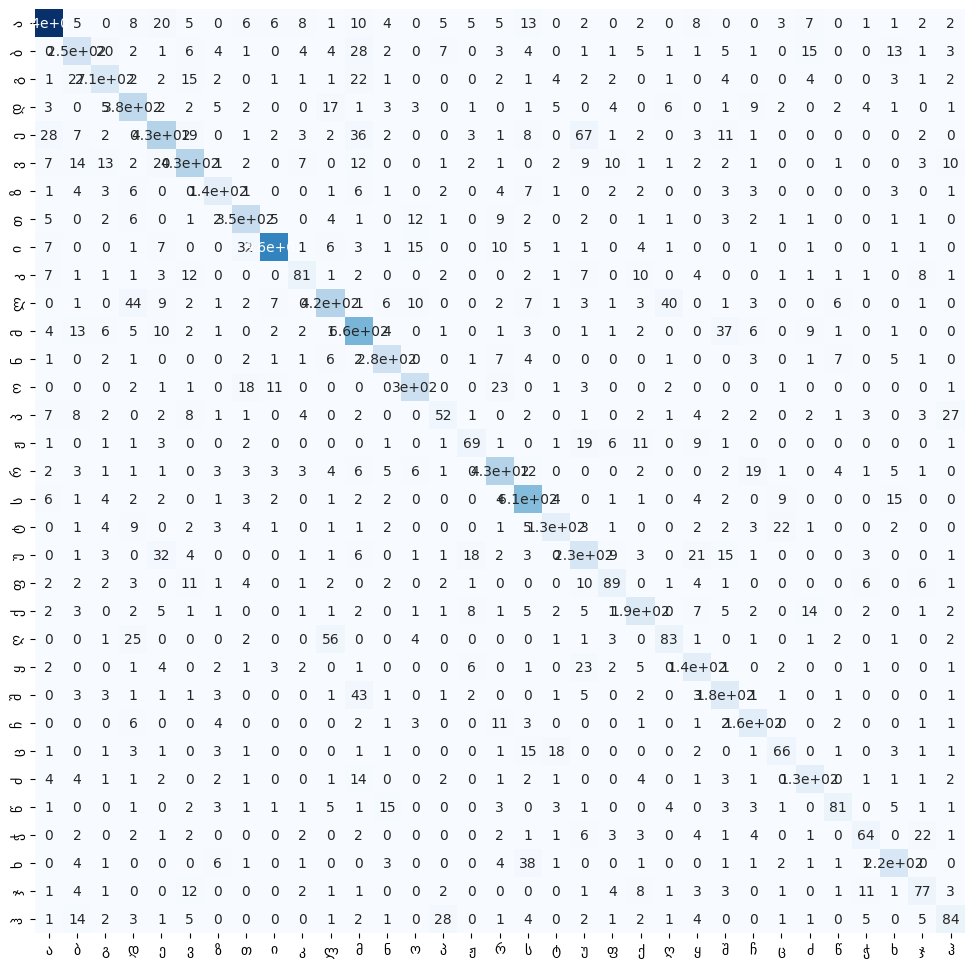

In [115]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, cbar=False, cmap='Blues', xticklabels=list(ENCODER.keys()), yticklabels=list(ENCODER.keys()))
plt.show()

In [116]:
model.save('geo_model.model',save_format='h5')